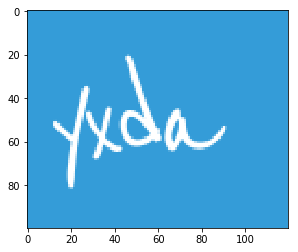

In [6]:
import io                                                                       
from PIL import Image                                                           
import pytesseract       
import matplotlib.pyplot as plt
import cv2
import PIL
import numpy

raw_data = open('captcha.png', 'rb').read()
img = Image.open(io.BytesIO(raw_data))  
img2 = img.point(lambda x: 0 if x < 230 else 255)
plt.imshow(img)


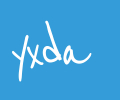

In [7]:
from PIL import Image
image = Image.open('captcha.png')
image

In [8]:

pil_image = PIL.Image.open('captcha.png').convert('RGB') 
open_cv_image = numpy.array(pil_image)
open_cv_image


array([[[ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216],
        ...,
        [ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216]],

       [[ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216],
        ...,
        [ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216]],

       [[ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216],
        ...,
        [ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216]],

       ...,

       [[ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216],
        ...,
        [ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216]],

       [[ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216],
        ...,
        [ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216]],

       [[ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216],
        ...,
        [ 52, 156, 216],
        [ 52, 156, 216],
        [ 52, 156, 216]]

Populating the interactive namespace from numpy and matplotlib


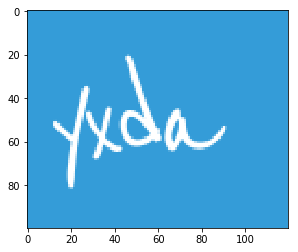

In [9]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [10]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 231, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [12]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    if y < 48 and w >= 16:
        ary.append((x,y,w,h) )

In [13]:
print(ary)


[(12, 35, 16, 46), (27, 45, 16, 23), (43, 21, 18, 41), (64, 46, 27, 18)]


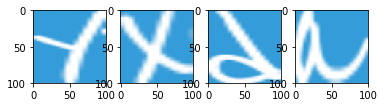

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    res = cv2.resize(thresh,(100,100))
    cv2.imwrite("%d.png"%(id),res)
    plt.imshow(res)

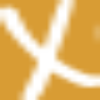

In [15]:
import io                                                                       
from PIL import Image                                                           
import pytesseract       

raw_data = open('1.png', 'rb').read()
img = Image.open(io.BytesIO(raw_data))  
img
                    


In [24]:
import cv2
from skimage import img_as_float
pic0=cv2.imread('0.png')
pic1=cv2.imread('1.png')
pic2=cv2.imread('2.png')
pic3=cv2.imread('3.png')

def mse(imageA,imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) **2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

#print(mse(pic0,pic1))

15692.1446


In [26]:
import os

def getNumber(pic):
    min_a=999999999
    min_png= None
    for png in os.listdir('IMG'):
        ref=cv2.imread("IMG/" + png)
        if mse(ref,pic)<min_a:
            mib_a = mse(ref,pic)
            min_png = png
    return min_png,min_a

print(getNumber(pic0))
print(getNumber(pic1))
print(getNumber(pic2))
print(getNumber(pic3))

('z.png', 999999999)
('z.png', 999999999)
('z.png', 999999999)
('z.png', 999999999)


('z.png', 999999999)

In [197]:
?? string

Object `string` not found.


In [27]:
import PIL
import numpy
pil_image = PIL.Image.open('l.png').convert('RGB') 
open_cv_image = numpy.array(pil_image)
open_cv_image


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Populating the interactive namespace from numpy and matplotlib


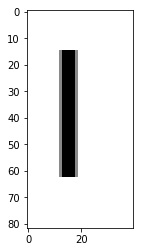

In [28]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [33]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 0, 100, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [34]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [35]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    if h>40 and h<100:
        ary.append((x,y,w,h) )
print(ary)
print(len(ary))

[(0, 0, 40, 82), (12, 14, 7, 50)]
2


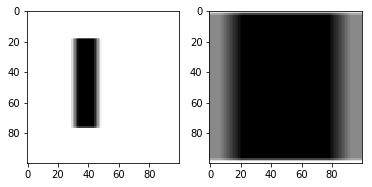

In [36]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    res = cv2.resize(thresh,(100,100))
    cv2.imwrite("%d.png"%(id),res)
    plt.imshow(res)

In [229]:
ary = [(143, 194, 11, 12), (173, 44, 45, 54), (175, 380, 29, 53), (181, 549, 48, 71), (191, 194, 43, 71), (231, 380, 43, 54), (247, 26, 46, 72)]